In [2]:
import pandas as pd
import numpy as np

train=pd.read_csv('train_features.csv')
train_labels=pd.read_csv('train_labels.csv')
test=pd.read_csv('test_features.csv')
submission=pd.read_csv('sample_submission.csv')

In [3]:
train

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234
...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478


In [4]:
#train_labels.csv 에서 id 가 수행한 동작과 그에 따른 label값을 확인
train_labels

,id,label,label_desc
0,0,37,Shoulder Press (dumbbell)
1,1,26,Non-Exercise
2,2,3,Biceps Curl (band)
3,3,26,Non-Exercise
4,4,26,Non-Exercise
...,...,...,...
3120,3120,26,Non-Exercise
3121,3121,26,Non-Exercise
3122,3122,15,Dynamic Stretch (at your own pace)
3123,3123,26,Non-Exercise


In [5]:
# Non-Exercise 경우 0, 아닐 경우 1
mapper = {'Non-Exercise': 0} 
train_labels['label_desc'].replace(mapper, inplace=True)
train_labels['do_not'] = [0 if x in [0] else 1 for x in train_labels['label_desc']]
train_labels.drop('label', axis=1, inplace=True)
train_labels.drop('label_desc', axis=1, inplace=True)

0    Shoulder Press (dumbbell)
1                            0
2           Biceps Curl (band)
3                            0
4                            0
Name: label_desc, dtype: object

In [7]:
train_labels # label 값 확인

,id,do_not
0,0,1
1,1,0
2,2,1
3,3,0
4,4,0
...,...,...
3120,3120,0
3121,3121,0
3122,3122,1
3123,3123,0


In [8]:
merge_outer = pd.merge(train,train_labels, how='outer',on='id') # train 데이터와 label 데이터 합치기
merge_outer

,id,time,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,do_not
0,0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1
1,0,1,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1
2,0,2,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1
3,0,3,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1
4,0,4,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1
...,...,...,...,...,...,...,...,...,...
1874995,3124,595,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,1
1874996,3124,596,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,1
1874997,3124,597,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,1
1874998,3124,598,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,1


In [9]:
merge_outer.drop('time', axis=1, inplace=True) # Time 항목 제거
merge_outer

,id,acc_x,acc_y,acc_z,gy_x,gy_y,gy_z,do_not
0,0,1.206087,-0.179371,-0.148447,-0.591608,-30.549010,-31.676112,1
1,0,1.287696,-0.198974,-0.182444,0.303100,-39.139103,-24.927216,1
2,0,1.304609,-0.195114,-0.253382,-3.617278,-44.122565,-25.019629,1
3,0,1.293095,-0.230366,-0.215210,2.712986,-53.597843,-27.454013,1
4,0,1.300887,-0.187757,-0.222523,4.286707,-57.906561,-27.961234,1
...,...,...,...,...,...,...,...,...
1874995,3124,-0.712530,-0.658357,0.293707,-29.367857,-104.013664,-76.290437,1
1874996,3124,-0.683037,-0.658466,0.329223,-30.149089,-101.796809,-76.625087,1
1874997,3124,-0.664730,-0.666625,0.364114,-27.873095,-98.776072,-79.365125,1
1874998,3124,-0.630534,-0.682565,0.373696,-23.636550,-99.139495,-80.259478,1


In [14]:
from pycaret.classification import * 

clf = setup(merge_outer, target='do_not') # 세팅

,Description,Value
0,session_id,694
1,Target,do_not
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(1875000, 8)"
5,Missing Values,False
6,Numeric Features,7
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [15]:
# 모델 비교
# compare_models()

In [16]:
model_dt = create_model('dt') # Decision Tree Calssifier (제일 정확성 높은 모델)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8614,0.8613,0.8669,0.8640,0.8655,0.7226,0.7226
1,0.8568,0.8566,0.8619,0.8599,0.8609,0.7133,0.7133
2,0.8584,0.8582,0.8644,0.8607,0.8626,0.7165,0.7165
3,0.8594,0.8592,0.8659,0.8614,0.8636,0.7186,0.7186
4,0.8507,0.8505,0.8564,0.8537,0.8550,0.7011,0.7011
5,0.8613,0.8612,0.8657,0.8648,0.8652,0.7224,0.7224
6,0.8638,0.8636,0.8699,0.8658,0.8678,0.7273,0.7273
7,0.8597,0.8595,0.8664,0.8614,0.8639,0.7191,0.7191
8,0.8589,0.8587,0.8666,0.8600,0.8633,0.7175,0.7175
9,0.8570,0.8568,0.8628,0.8595,0.8612,0.7137,0.7137


In [17]:
# 튜닝
# tuned_dt = tune_model(model_dt) # 튜닝 후 성능 하락(?)

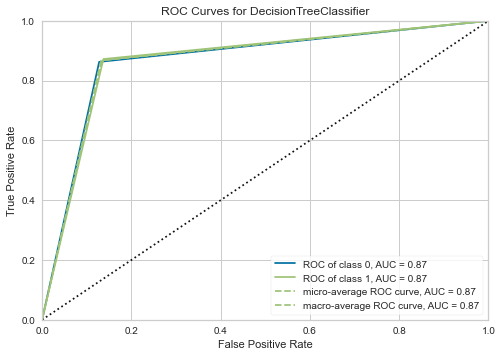

In [18]:
plot_model(model_dt) # ROC곡선과 AUC

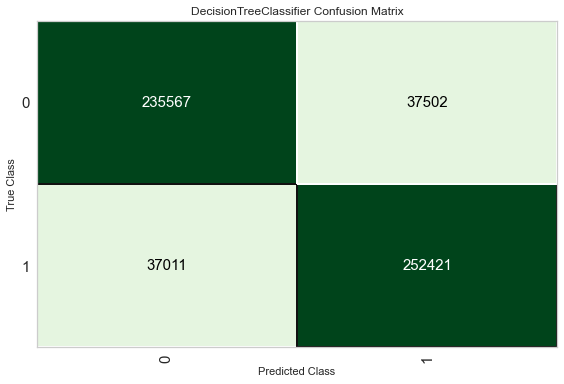

In [19]:
plot_model(estimator = model_dt, plot = 'confusion_matrix') # 오차 행렬

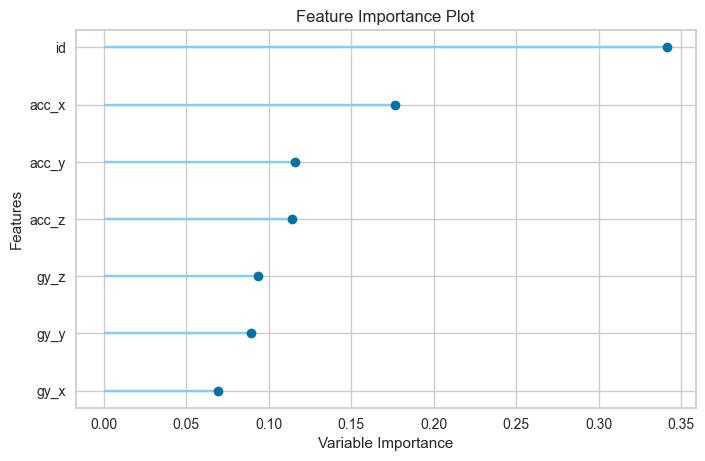

In [20]:
plot_model(estimator = model_dt, plot = 'feature')

In [21]:
#Finalize model_dt (과소적합 확인 -> 최종모델)
dt_final = finalize_model(model_dt)